In [1]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [2]:
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)


In [3]:
# prepare situation

X = series.values


In [4]:
window = 3 #days
history = [X[i] for i in range(window)]

In [5]:
test = [X[i] for i in range(window, len(X))]


In [6]:
predictions = list() # initiate predictions list

In [7]:
for t in range(len(test)):  #test 
    length = len(history)

    sum = 0
    weight = 1
    #yhat = mean([history[i] for i in range(length-window,length)]) #predictions
    for i in range(length-window, length):
        sum += history[i] * weight/6
        weight += 1
        
    
    yhat = sum
    obs = test[t] #truths
    
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=31.500000, expected=31.000000
predicted=30.833333, expected=44.000000
predicted=37.333333, expected=29.000000
predicted=34.333333, expected=45.000000
predicted=39.500000, expected=43.000000
predicted=41.333333, expected=38.000000
predicted=40.833333, expected=27.000000
predicted=33.333333, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=33.666667, expected=55.000000
predicted=44.833333, expected=47.000000
predicted=47.333333, expected=45.000000
predicted=47.333333, expected=37.000000
predicted=41.333333, expected=50.000000
predicted=44.833333, expected=43.000000
predicted=44.333333, expected=41.000000
predicted=43.166667, expected=52.000000
predicted=46.833333, expected=34.000000
predicted=41.166667, expected=53.000000
predicted=46.500000, expected=39.000000
predicted=42.833333, expected=32.000000
predicted=37.833333, expected=37.000000
predicted=35.666667, expected=43.000000
predicted=39.166667, expected=39.000000
predicted=40.000000, expected=35.000000


/var/folders/63/m3rv9r0166gbhjxz6gbpsbjm0000gn/T/ipykernel_93635/1712364307.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


In [8]:
error = mean_squared_error(test, predictions)


In [9]:
print('Test MSE: %.3f' % error)

Test MSE: 62.126


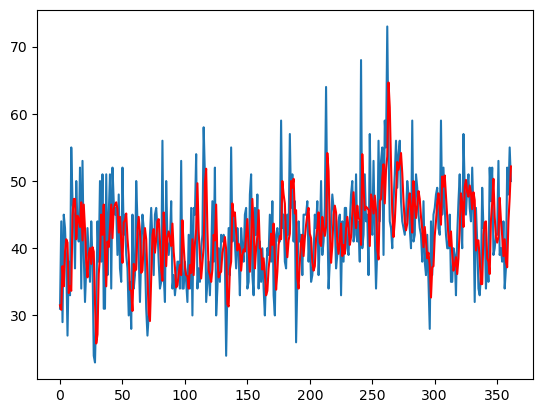

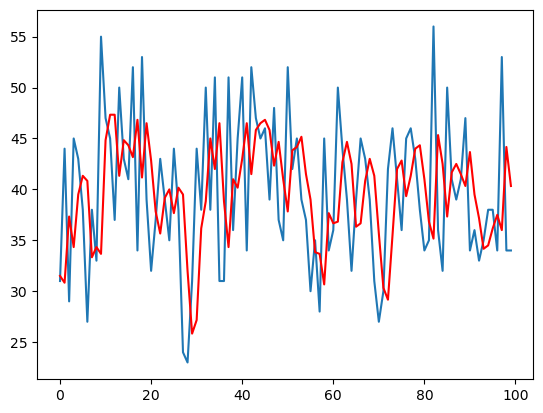

In [10]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# zoom plot into first 100 data
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()